In [1]:
import torch
import numpy as np
import pandas as pd
import anndata as ad
import multiDGD
import os
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

os.chdir('../..')
os.getcwd()

'/home/vschuste/projects/interpreting_omics_models'

In [2]:

data_dir = '/home/vschuste/data/singlecell/'
data = ad.read_h5ad(data_dir+'human_bonemarrow.h5ad')

In [3]:
# compute PCAs for GEX, ATAC, and both

# GEX
pca_gex = PCA(n_components=5000)
pca_gex.fit(np.asarray(data.X[:,data.var['modality']=='GEX'].todense()))

PCA(n_components=5000)

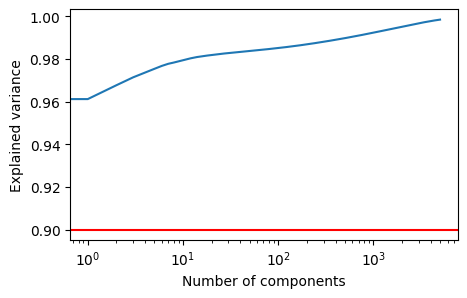

In [4]:
fig, ax = plt.subplots(figsize=(5, 3))
plt.plot(np.cumsum(pca_gex.explained_variance_ratio_))
plt.xscale('log')
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
# draw a line at 90% explained variance
plt.axhline(y=0.9, color='r', linestyle='-')
plt.show()

#for threshold in [0.9, 0.95, 0.99, 0.999999]:
#    print("Number of components explaining {}% variance: {}".format(threshold * 100, np.where(np.cumsum(pca_gex.explained_variance_ratio_) > threshold)[0][0]))

In [ ]:
# ATAC
pca_atac = PCA(n_components=5000)
pca_atac.fit(data.X[:,data.var['modality']=='ATAC'].todense())

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))
plt.plot(np.cumsum(pca_atac.explained_variance_ratio_))
plt.xscale('log')
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
# draw a line at 90% explained variance
plt.axhline(y=0.9, color='r', linestyle='-')
plt.show()

for threshold in [0.9, 0.95, 0.99, 0.999999]:
    print("Number of components explaining {}% variance: {}".format(threshold * 100, np.where(np.cumsum(pca_atac.explained_variance_ratio_) > threshold)[0][0]))

In [ ]:
# GEX+ATAC
pca_shared = PCA(n_components=5000)
pca_shared.fit(data.X.todense())

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))
plt.plot(np.cumsum(pca_shared.explained_variance_ratio_))
plt.xscale('log')
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
# draw a line at 90% explained variance
plt.axhline(y=0.9, color='r', linestyle='-')
plt.show()

for threshold in [0.9, 0.95, 0.99, 0.999999]:
    print("Number of components explaining {}% variance: {}".format(threshold * 100, np.where(np.cumsum(pca_shared.explained_variance_ratio_) > threshold)[0][0]))